In [46]:
!pip install scikit-fuzzy
!pip install matplotlib scipy

In [73]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
fitness = ctrl.Antecedent(np.arange(0, 11, 1), 'fitness')
energy = ctrl.Antecedent(np.arange(0, 11, 1), 'energy')
goal = ctrl.Antecedent(np.arange(0, 3, 1), 'goal')
age = ctrl.Antecedent(np.arange(15, 81, 1), 'age')
weight = ctrl.Antecedent(np.arange(40, 121, 1), 'weight')

intensity = ctrl.Consequent(np.arange(0, 11, 1), 'intensity')
duration = ctrl.Consequent(np.arange(0, 91, 1), 'duration')

In [74]:
# Fitness
fitness['beginner'] = fuzz.trapmf(fitness.universe, [0, 0, 2, 4])
fitness['intermediate'] = fuzz.trimf(fitness.universe, [3, 5, 7])
fitness['advanced'] = fuzz.trapmf(fitness.universe, [6, 8, 10, 10])

# Energy
energy['low'] = fuzz.trapmf(energy.universe, [0, 0, 2, 4])
energy['medium'] = fuzz.trimf(energy.universe, [3, 5, 7])
energy['high'] = fuzz.trapmf(energy.universe, [6, 8, 10, 10])

# Goal
goal['weight_loss'] = fuzz.trimf(goal.universe, [-0.5, 0, 0.5])
goal['muscle_gain'] = fuzz.trimf(goal.universe, [0.5, 1, 1.5])
goal['general_fitness'] = fuzz.trimf(goal.universe, [1.5, 2, 2.5])

# Age
age['young'] = fuzz.trapmf(age.universe, [15, 15, 20, 35])
age['middle'] = fuzz.trimf(age.universe, [30, 45, 60])
age['elderly'] = fuzz.trapmf(age.universe, [55, 70, 80, 80])

# Weight
weight['under'] = fuzz.trapmf(weight.universe, [40, 40, 50, 60])
weight['normal'] = fuzz.trimf(weight.universe, [55, 65, 75])
weight['over'] = fuzz.trapmf(weight.universe, [70, 85, 120, 120])

# Intensity
intensity['low'] = fuzz.trapmf(intensity.universe, [0, 0, 2, 4])
intensity['medium'] = fuzz.trimf(intensity.universe, [3, 5, 7])
intensity['high'] = fuzz.trapmf(intensity.universe, [6, 8, 10, 10])

# Duration
duration['short'] = fuzz.trapmf(duration.universe, [0, 0, 15, 30])
duration['medium'] = fuzz.trimf(duration.universe, [25, 45, 65])
duration['long'] = fuzz.trapmf(duration.universe, [60, 75, 90, 90])


In [76]:
# --- INTENSITY RULES ---
rule1 = ctrl.Rule(fitness['beginner'] & energy['low'], intensity['low'])
rule2 = ctrl.Rule(fitness['beginner'] & energy['medium'], intensity['low'])
rule3 = ctrl.Rule(fitness['beginner'] & energy['high'], intensity['medium'])
rule4 = ctrl.Rule(fitness['intermediate'] & energy['low'], intensity['low'])
rule5 = ctrl.Rule(fitness['intermediate'] & energy['medium'], intensity['medium'])
rule6 = ctrl.Rule(fitness['intermediate'] & energy['high'], intensity['high'])
rule7 = ctrl.Rule(fitness['advanced'] & energy['low'], intensity['medium'])
rule8 = ctrl.Rule(fitness['advanced'] & energy['medium'], intensity['high'])
rule9 = ctrl.Rule(fitness['advanced'] & energy['high'], intensity['high'])
rule10 = ctrl.Rule(age['elderly'], intensity['low'])
rule11 = ctrl.Rule(age['middle'] & energy['high'], intensity['medium'])
rule12 = ctrl.Rule(goal['muscle_gain'] & energy['high'], intensity['high'])
rule13 = ctrl.Rule(goal['weight_loss'] & fitness['beginner'], intensity['medium'])
rule14 = ctrl.Rule(weight['under'] & goal['muscle_gain'], intensity['medium'])
rule15 = ctrl.Rule(energy['low'] & age['elderly'], intensity['low'])
rule16 = ctrl.Rule(goal['general_fitness'] & fitness['beginner'], intensity['low'])
rule17 = ctrl.Rule(goal['general_fitness'] & fitness['intermediate'], intensity['medium'])
rule18 = ctrl.Rule(goal['general_fitness'] & fitness['advanced'], intensity['high'])
rule19 = ctrl.Rule(goal['muscle_gain'] & fitness['intermediate'] & energy['medium'], intensity['high'])
rule20 = ctrl.Rule(goal['weight_loss'] & fitness['advanced'] & energy['medium'], intensity['medium'])
rule21 = ctrl.Rule(weight['under'] & energy['low'], intensity['low'])
rule22 = ctrl.Rule(weight['over'] & energy['high'] & goal['muscle_gain'], intensity['high'])
rule23 = ctrl.Rule(age['middle'] & energy['low'], intensity['low'])
rule24 = ctrl.Rule(age['young'] & energy['high'], intensity['high'])

# --- DURATION RULES ---
rule25 = ctrl.Rule(goal['weight_loss'] & weight['over'], duration['long'])
rule26 = ctrl.Rule(goal['weight_loss'] & energy['low'], duration['medium'])
rule27 = ctrl.Rule(goal['muscle_gain'], duration['medium'])
rule28 = ctrl.Rule(goal['general_fitness'] & energy['low'], duration['short'])
rule29 = ctrl.Rule(goal['general_fitness'] & energy['high'], duration['medium'])
rule30 = ctrl.Rule(fitness['advanced'] & energy['high'], duration['long'])
rule31 = ctrl.Rule(fitness['beginner'] & energy['low'], duration['short'])
rule32 = ctrl.Rule(age['elderly'], duration['short'])
rule33 = ctrl.Rule(age['middle'] & energy['medium'], duration['medium'])
rule34 = ctrl.Rule(age['young'] & energy['high'], duration['long'])
rule35 = ctrl.Rule(weight['under'] & goal['muscle_gain'], duration['medium'])
rule36 = ctrl.Rule(weight['normal'] & goal['general_fitness'], duration['medium'])
rule37 = ctrl.Rule(weight['over'] & energy['low'], duration['short'])
rule38 = ctrl.Rule(fitness['intermediate'] & goal['muscle_gain'], duration['medium'])
rule39 = ctrl.Rule(goal['weight_loss'] & fitness['advanced'], duration['long'])
rule40 = ctrl.Rule(goal['general_fitness'] & energy['medium'], duration['medium'])
rule41 = ctrl.Rule(age['elderly'] & energy['high'], duration['medium'])
rule42 = ctrl.Rule(fitness['advanced'] & goal['general_fitness'], duration['medium'])
rule43 = ctrl.Rule(weight['under'] & goal['weight_loss'], duration['short'])
rule44 = ctrl.Rule(age['young'] & energy['medium'], duration['medium'])
rule45 = ctrl.Rule(fitness['intermediate'] & goal['general_fitness'], duration['medium'])
rule46 = ctrl.Rule(weight['over'] & goal['muscle_gain'], duration['long'])
rule47 = ctrl.Rule(age['middle'] & goal['weight_loss'], duration['medium'])

In [42]:
# Change some rules based on user preferences
def adjust_rules_based_on_preference(preference):
    global rule3, rule5, rule8, rule12, rule18, rule19, rule22

    if preference == "lighter":
        # Chaneg rules with high or medium intensity to be lighter
        rule3 = ctrl.Rule(fitness['beginner'] & energy['high'], intensity['low'])
        rule5 = ctrl.Rule(fitness['intermediate'] & energy['medium'], intensity['low'])
        rule8 = ctrl.Rule(fitness['advanced'] & energy['medium'], intensity['medium'])
        rule12 = ctrl.Rule(goal['muscle_gain'] & energy['high'], intensity['medium'])
        rule18 = ctrl.Rule(goal['general_fitness'] & fitness['advanced'], intensity['medium'])
        rule19 = ctrl.Rule(goal['muscle_gain'] & fitness['intermediate'] & energy['medium'], intensity['medium'])
        rule22 = ctrl.Rule(weight['over'] & energy['high'] & goal['muscle_gain'], intensity['medium'])

    elif preference == "harder":
        # Chaneg rules with low or medium intensity to be harder
        rule3 = ctrl.Rule(fitness['beginner'] & energy['high'], intensity['high'])
        rule5 = ctrl.Rule(fitness['intermediate'] & energy['medium'], intensity['high'])
        rule8 = ctrl.Rule(fitness['advanced'] & energy['medium'], intensity['high'])
        rule12 = ctrl.Rule(goal['muscle_gain'] & energy['high'], intensity['high'])
        rule18 = ctrl.Rule(goal['general_fitness'] & fitness['advanced'], intensity['high'])
        rule19 = ctrl.Rule(goal['muscle_gain'] & fitness['intermediate'] & energy['medium'], intensity['high'])
        rule22 = ctrl.Rule(weight['over'] & energy['high'] & goal['muscle_gain'], intensity['high'])


# User preferences
user_pref = input("Do you prefer 'lighter' or 'harder' workouts? (Type 'lighter', 'harder' or press Enter to skip): ").strip().lower()
if user_pref in ["lighter", "harder"]:
    adjust_rules_based_on_preference(user_pref)

Do you prefer 'lighter' or 'harder' workouts? (Type 'lighter', 'harder' or press Enter to skip): lighter


In [77]:
# Control system
intensity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                                     rule7, rule8, rule9, rule10, rule11, rule12,
                                     rule13, rule14, rule15, rule16, rule17, rule18,
                                     rule19, rule20,rule21, rule22, rule23, rule24])

duration_ctrl = ctrl.ControlSystem([rule25, rule26, rule27, rule28, rule29,
                                    rule30, rule31, rule32, rule33, rule34,
                                    rule35, rule36, rule37, rule38, rule39,
                                    rule40, rule41, rule42, rule43, rule44,
                                    rule45, rule46, rule47])

# Simulators
intensity_sim = ctrl.ControlSystemSimulation(intensity_ctrl)
duration_sim = ctrl.ControlSystemSimulation(duration_ctrl)


In [78]:
def categorize_output(value, variable):
    if variable == 'intensity':
        memberships = {
            'Low': fuzz.interp_membership(intensity.universe, intensity['low'].mf, value),
            'Medium': fuzz.interp_membership(intensity.universe, intensity['medium'].mf, value),
            'High': fuzz.interp_membership(intensity.universe, intensity['high'].mf, value)
        }
    elif variable == 'duration':
        memberships = {
            'Short': fuzz.interp_membership(duration.universe, duration['short'].mf, value),
            'Medium': fuzz.interp_membership(duration.universe, duration['medium'].mf, value),
            'Long': fuzz.interp_membership(duration.universe, duration['long'].mf, value)
        }
    else:
        raise ValueError("Unknown variable for categorization.")

    # Return the label with the highest degree of membership
    return max(memberships, key=memberships.get)


In [79]:
def test_system(fitness_val, energy_val, goal_val, age_val, weight_val):
    # Set input values
    intensity_sim.input['fitness'] = fitness_val
    intensity_sim.input['energy'] = energy_val
    intensity_sim.input['goal'] = goal_val
    intensity_sim.input['age'] = age_val
    intensity_sim.input['weight'] = weight_val

    duration_sim.input['fitness'] = fitness_val
    duration_sim.input['energy'] = energy_val
    duration_sim.input['goal'] = goal_val
    duration_sim.input['age'] = age_val
    duration_sim.input['weight'] = weight_val

    # Compute results
    intensity_sim.compute()
    duration_sim.compute()

    # Get crisp outputs
    intensity_value = intensity_sim.output['intensity']
    duration_value = duration_sim.output['duration']

    # Get fuzzy categories using membership functions
    intensity_cat = categorize_output(intensity_value, 'intensity')
    duration_cat = categorize_output(duration_value, 'duration')

    # Display results
    print(f"Test Case: Fitness: {fitness_val}, Energy: {energy_val}, Goal: {goal_val}, Age: {age_val}, Weight: {weight_val}")
    print(f"Recommended Intensity: {intensity_cat} ({intensity_value:.2f})")
    print(f"Recommended Duration: {duration_cat} ({duration_value:.2f})\n")




test_system(2, 5, 1, 22, 68) # 1. Beginner, medium energy, muscle gain, young, normal weight
test_system(5, 2, 0, 45, 90) # 2. Intermediate, low energy, weight loss, middle-aged, overweight
test_system(9, 5, 2, 70, 45) # 3. Advanced, medium energy, general fitness, elderly, underweight
test_system(1, 9, 0, 50, 95) # 4. Beginner, high energy, weight loss, middle-aged, overweight
test_system(9, 1, 1, 28, 72) # 5. Advanced, low energy, muscle gain, young, normal weight
test_system(6, 9, 2, 30, 85) # 6. Intermediate, high energy, general fitness, young, overweight
test_system(1, 1, 2, 67, 48) # 7. Beginner, low energy, general fitness, elderly, underweight
test_system(5, 5, 1, 66, 70) # 8. Intermediate, medium energy, muscle gain, elderly, normal weight
test_system(8, 9, 0, 55, 100) # 9. Advanced, high energy, weight loss, middle-aged, overweight
test_system(3, 5, 2, 23, 49) # 10. Beginner, medium energy, general fitness, young, underweight
test_system(5, 2, 2, 68, 65) # 11. Intermediate, low energy, general fitness, elderly, normal weight
test_system(9, 6, 1, 29, 88) # 12. Advanced, medium energy, muscle gain, young, overweight


Test Case: Fitness: 2, Energy: 5, Goal: 1, Age: 22, Weight: 68
Recommended Intensity: Low (1.56)
Recommended Duration: Medium (45.00)

Test Case: Fitness: 5, Energy: 2, Goal: 0, Age: 45, Weight: 90
Recommended Intensity: Low (1.56)
Recommended Duration: Medium (45.00)

Test Case: Fitness: 9, Energy: 5, Goal: 2, Age: 70, Weight: 45
Recommended Intensity: Medium (5.00)
Recommended Duration: Short (27.35)

Test Case: Fitness: 1, Energy: 9, Goal: 0, Age: 50, Weight: 95
Recommended Intensity: Medium (5.00)
Recommended Duration: Long (63.63)

Test Case: Fitness: 9, Energy: 1, Goal: 1, Age: 28, Weight: 72
Recommended Intensity: Medium (5.00)
Recommended Duration: Medium (45.00)

Test Case: Fitness: 6, Energy: 9, Goal: 2, Age: 30, Weight: 85
Recommended Intensity: High (6.74)
Recommended Duration: Medium (54.72)

Test Case: Fitness: 1, Energy: 1, Goal: 2, Age: 67, Weight: 48
Recommended Intensity: Low (1.56)
Recommended Duration: Short (11.67)

Test Case: Fitness: 5, Energy: 5, Goal: 1, Age: 6

This cell is for plotting only!

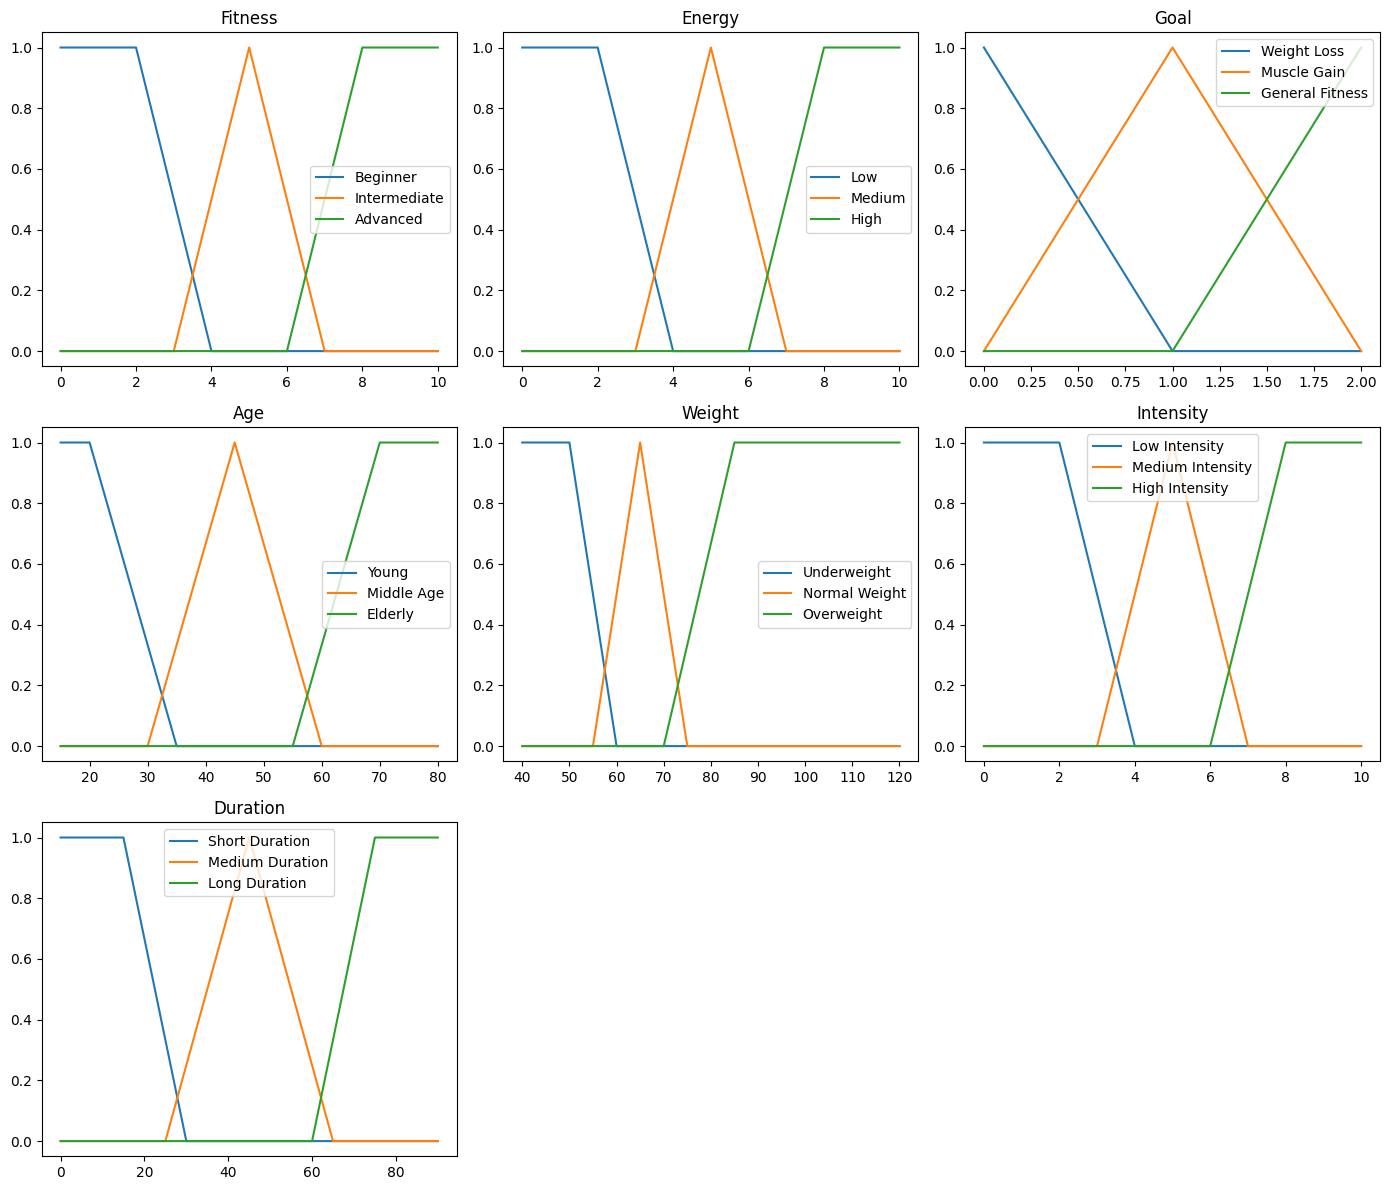

In [80]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Define universe ranges
fitness_universe = np.arange(0, 11, 1)
energy_universe = np.arange(0, 11, 1)
goal_universe = np.arange(0, 3, 1)
age_universe = np.arange(15, 81, 1)
weight_universe = np.arange(40, 121, 1)
intensity_universe = np.arange(0, 11, 1)
duration_universe = np.arange(0, 91, 1)

# Define fuzzy variables and their membership functions

# Fitness
fitness_beginner = fuzz.trapmf(fitness_universe, [0, 0, 2, 4])
fitness_intermediate = fuzz.trimf(fitness_universe, [3, 5, 7])
fitness_advanced = fuzz.trapmf(fitness_universe, [6, 8, 10, 10])

# Energy
energy_low = fuzz.trapmf(energy_universe, [0, 0, 2, 4])
energy_medium = fuzz.trimf(energy_universe, [3, 5, 7])
energy_high = fuzz.trapmf(energy_universe, [6, 8, 10, 10])

# Goal
goal_weight_loss = fuzz.trimf(goal_universe, [-0.5, 0, 0.5])
goal_muscle_gain = fuzz.trimf(goal_universe, [0.5, 1, 1.5])
goal_general_fitness = fuzz.trimf(goal_universe, [1.5, 2, 2.5])

# Age
age_young = fuzz.trapmf(age_universe, [15, 15, 20, 35])
age_middle = fuzz.trimf(age_universe, [30, 45, 60])
age_elderly = fuzz.trapmf(age_universe, [55, 70, 80, 80])

# Weight
weight_under = fuzz.trapmf(weight_universe, [40, 40, 50, 60])
weight_normal = fuzz.trimf(weight_universe, [55, 65, 75])
weight_over = fuzz.trapmf(weight_universe, [70, 85, 120, 120])

# Intensity
intensity_low = fuzz.trapmf(intensity_universe, [0, 0, 2, 4])
intensity_medium = fuzz.trimf(intensity_universe, [3, 5, 7])
intensity_high = fuzz.trapmf(intensity_universe, [6, 8, 10, 10])

# Duration
duration_short = fuzz.trapmf(duration_universe, [0, 0, 15, 30])
duration_medium = fuzz.trimf(duration_universe, [25, 45, 65])
duration_long = fuzz.trapmf(duration_universe, [60, 75, 90, 90])

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(14, 12))

# Plot Fitness Membership Functions
axs[0, 0].plot(fitness_universe, fitness_beginner, label='Beginner')
axs[0, 0].plot(fitness_universe, fitness_intermediate, label='Intermediate')
axs[0, 0].plot(fitness_universe, fitness_advanced, label='Advanced')
axs[0, 0].set_title('Fitness')
axs[0, 0].legend()

# Plot Energy Membership Functions
axs[0, 1].plot(energy_universe, energy_low, label='Low')
axs[0, 1].plot(energy_universe, energy_medium, label='Medium')
axs[0, 1].plot(energy_universe, energy_high, label='High')
axs[0, 1].set_title('Energy')
axs[0, 1].legend()

# Plot Goal Membership Functions
axs[0, 2].plot(goal_universe, goal_weight_loss, label='Weight Loss')
axs[0, 2].plot(goal_universe, goal_muscle_gain, label='Muscle Gain')
axs[0, 2].plot(goal_universe, goal_general_fitness, label='General Fitness')
axs[0, 2].set_title('Goal')
axs[0, 2].legend()

# Plot Age Membership Functions
axs[1, 0].plot(age_universe, age_young, label='Young')
axs[1, 0].plot(age_universe, age_middle, label='Middle Age')
axs[1, 0].plot(age_universe, age_elderly, label='Elderly')
axs[1, 0].set_title('Age')
axs[1, 0].legend()

# Plot Weight Membership Functions
axs[1, 1].plot(weight_universe, weight_under, label='Underweight')
axs[1, 1].plot(weight_universe, weight_normal, label='Normal Weight')
axs[1, 1].plot(weight_universe, weight_over, label='Overweight')
axs[1, 1].set_title('Weight')
axs[1, 1].legend()

# Plot Intensity Membership Functions
axs[1, 2].plot(intensity_universe, intensity_low, label='Low Intensity')
axs[1, 2].plot(intensity_universe, intensity_medium, label='Medium Intensity')
axs[1, 2].plot(intensity_universe, intensity_high, label='High Intensity')
axs[1, 2].set_title('Intensity')
axs[1, 2].legend()

# Plot Duration Membership Functions
axs[2, 0].plot(duration_universe, duration_short, label='Short Duration')
axs[2, 0].plot(duration_universe, duration_medium, label='Medium Duration')
axs[2, 0].plot(duration_universe, duration_long, label='Long Duration')
axs[2, 0].set_title('Duration')
axs[2, 0].legend()

# Remove empty subplot
fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 2])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
